In [ ]:
pip install openai

🔑 OpenAI APIキーを入力してください: ··········
💡 アイデアのテーマを入力してください: 図を


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12510 (\N{KATAKANA LETTER MA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12452 (\N{KATAKANA LETTER I}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12531 (\N{KATAKANA LETTER N}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12489 (\N{KATAKANA LETTER DO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12483 (\N{KATAKANA LETTER SMALL TU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/l

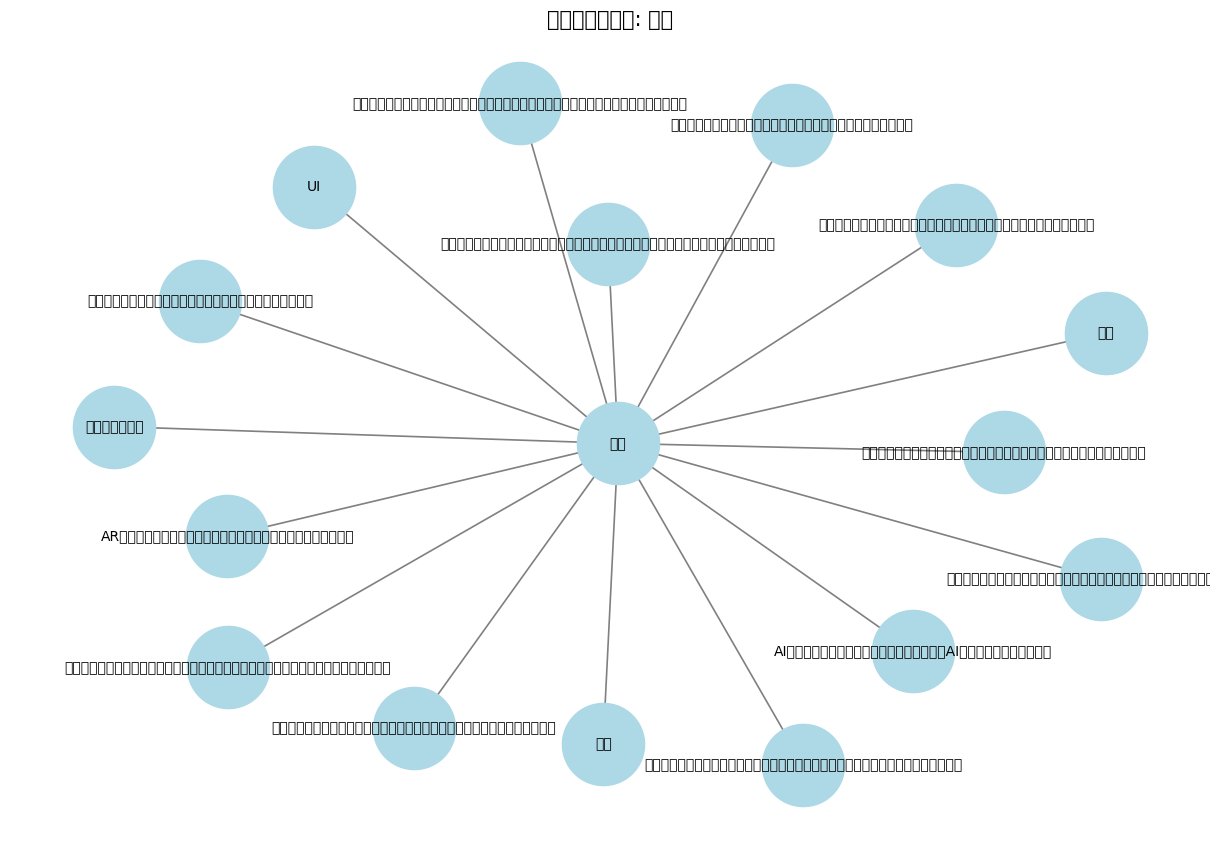

In [1]:
import openai
import getpass
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# ✅ APIキーを手入力
API_KEY = getpass.getpass("🔑 OpenAI APIキーを入力してください: ")

# ✅ OpenAI クライアント作成
client = openai.Client(api_key=API_KEY)

# ✅ マインドマップ生成プロンプト
mindmap_prompt = """
あなたは創造的な発想を支援するAIです。
以下のルールに従って、アイデアをマインドマップ形式で提案してください。

【テーマ】{user_idea}

1. 主要カテゴリを **4~5個** 提案してください。（例: 機能, UI, 技術, ビジネスモデル など）
2. 各カテゴリについて、 **3~5個のサブアイデア** を展開してください。
3. サブアイデアには、 **具体的な説明を1文追加** してください。

出力形式:
- {user_idea}
  - [カテゴリ1]
    - [サブアイデア1]（説明）
    - [サブアイデア2]（説明）
  - [カテゴリ2]
    - [サブアイデア1]（説明）
    - [サブアイデア2]（説明）
"""

# ✅ アイデアのテーマをユーザー入力
user_idea = input("💡 アイデアのテーマを入力してください: ")

# ✅ GPT にアイデア生成を依頼
response = client.chat.completions.create(
    model="gpt-4o-mini",
    messages=[
        {"role": "system", "content": "あなたはアイデア発想を支援するAIです。"},
        {"role": "user", "content": mindmap_prompt.replace("{user_idea}", user_idea)}
    ],
    max_tokens=700,
    temperature=0.7
)

# ✅ 出力結果をパース
generated_text = response.choices[0].message.content.strip()
lines = generated_text.split("\n")

# ✅ NetworkXでマインドマップ作成
G = nx.Graph()
root = user_idea  # ユーザーの入力をルートノードにする
G.add_node(root)

parent = root
for line in lines[1:]:
    line = line.strip()
    if line.startswith("- "):
        parent = line.strip("- ")
        G.add_edge(root, parent)
    elif line.startswith("  - "):
        child = line.strip("  - ")
        G.add_edge(parent, child)

# ✅ 位置を調整して、ノード同士の距離を広げる
pos = nx.spring_layout(G, seed=42, k=1.2)  # `k` を大きくすると距離が広がる

# ✅ 日本語フォントを適用
plt.rcParams['font.family'] = "IPAexGothic"

# ✅ マインドマップの描画
plt.figure(figsize=(12, 8))
nx.draw(G, pos, with_labels=True, node_color="lightblue", edge_color="gray",
        node_size=3500, font_size=10, width=1.2)  # ノードサイズとフォントサイズを調整
plt.title(f"マインドマップ: {user_idea}", fontsize=15)
plt.show()
